Foram importadas as bibliotecas necessárias para a construção e avaliação do modelo. A biblioteca sklearn.datasets foi utilizada para carregar o dataset load_breast_cancer, enquanto train_test_split permitiu a divisão dos dados em subconjuntos de treino e teste. O modelo de árvore de decisão foi instanciado por meio do DecisionTreeClassifier. Para a avaliação do desempenho, o módulo sklearn.metrics foi empregado no cálculo de métricas como acurácia, precisão, recall e F1-score. As bibliotecas pandas, matplotlib.pyplot e seaborn foram utilizadas para auxiliar na visualização e análise dos dados por meio de tabelas e gráficos.

In [465]:
# Importação das bibliotecas necessárias para construção e avaliação do modelo
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Carregar Dados: breast_cancer = load_breast_cancer()

In [466]:
# Carrega o dataset para a variável breast_cancer
breast_cancer = load_breast_cancer()

Visualização das X(características) e y(classe)

In [467]:
print("Lista das características:") # Imprime a lista das características
for feature in breast_cancer.feature_names:
    print(f"- {feature}")

print("\nClasses possíveis:") # Imprime as classes presentes
for i, name in enumerate(breast_cancer.target_names):
    print(f"- {i} = {name}")


Lista das características:
- mean radius
- mean texture
- mean perimeter
- mean area
- mean smoothness
- mean compactness
- mean concavity
- mean concave points
- mean symmetry
- mean fractal dimension
- radius error
- texture error
- perimeter error
- area error
- smoothness error
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst smoothness
- worst compactness
- worst concavity
- worst concave points
- worst symmetry
- worst fractal dimension

Classes possíveis:
- 0 = malignant
- 1 = benign


Preparar X(características) e y (classe): X = breast_cancer.data, y = breast_cancer.target

In [468]:
X = breast_cancer.data # Separa o X para as características
y = breast_cancer.target # Separa o y para as classes

A base de dados foi dividida em dois subconjuntos: 70% para treino e 30% para teste. O conjunto de treino (X_train, y_train) é usado para que o modelo aprenda as relações entre as características e as classes. Já o conjunto de teste (X_test, y_test) é utilizado para avaliar o desempenho do modelo em dados que ele nunca viu, simulando sua aplicação no mundo real. A escolha da proporção 70/30 é comum por fornecer ao modelo dados suficientes para aprendizado, sem comprometer a qualidade da avaliação. Dessa forma, é possível obter um bom equilíbrio entre o treinamento eficaz e a verificação confiável da capacidade de generalização do modelo.

A estratificação, feita com o parâmetro stratify=y na função train_test_split, é essencial em problemas de classificação, pois garante que a proporção das classes seja mantida nos conjuntos de treino e teste. Isso evita desequilíbrios que poderiam comprometer o aprendizado do modelo ou gerar avaliações distorcidas, assegurando uma distribuição representativa das classes em ambos os subconjuntos.

In [469]:
# Separando conjuntos de treino com os de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTamanho do conjunto de treino (X_train): {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape[0]} amostras")


Tamanho do conjunto de treino (X_train): 398 amostras
Tamanho do conjunto de teste (X_test): 171 amostras


O modelo foi instanciado utilizando o algoritmo de árvore de decisão (DecisionTreeClassifier), uma abordagem interpretável e eficiente para tarefas de classificação. O parâmetro max_depth=9 foi definido com o objetivo de limitar a profundidade máxima da árvore, evitando que o modelo se torne excessivamente complexo e sofra overfitting (quando memoriza os dados de treino e perde capacidade de generalização).

In [470]:
# Uso do algoritmo de árvore de decisão como escolha do modelo
model = DecisionTreeClassifier(random_state=42, max_depth=9)

Treinar Modelo (usa apenas 70% dos dados).

In [471]:
# Treino de 70% dos dados
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")


Modelo treinado com sucesso!


Fazer Previsões. Analise de apenas características dos 30% restantes do dataset.Sem verificar suas classes.

In [472]:
# Realizar previsões com os dados de teste
predictions = model.predict(X_test)

print("\nAlgumas previsões do modelo no conjunto de teste:")

for i in range(10):
    predicted_cancer = breast_cancer.target_names[predictions[i]]
    actual_cancer = breast_cancer.target_names[y_test[i]]
    print(f"- Câncer de Mama {i+1}: Previsão: {predicted_cancer}, Real: {actual_cancer}")


Algumas previsões do modelo no conjunto de teste:
- Câncer de Mama 1: Previsão: malignant, Real: malignant
- Câncer de Mama 2: Previsão: benign, Real: benign
- Câncer de Mama 3: Previsão: benign, Real: benign
- Câncer de Mama 4: Previsão: malignant, Real: malignant
- Câncer de Mama 5: Previsão: benign, Real: malignant
- Câncer de Mama 6: Previsão: malignant, Real: malignant
- Câncer de Mama 7: Previsão: benign, Real: benign
- Câncer de Mama 8: Previsão: malignant, Real: malignant
- Câncer de Mama 9: Previsão: benign, Real: benign
- Câncer de Mama 10: Previsão: malignant, Real: malignant


A acurácia foi calculada utilizando a função accuracy_score para comparar as previsões do modelo com os valores reais. Essa métrica representa a proporção de acertos do modelo sobre o total de amostras avaliadas. É uma forma simples e eficaz de medir o desempenho geral, especialmente quando as classes estão balanceadas. No entanto, em cenários com classes desbalanceadas, a acurácia pode ser insuficiente, sendo recomendável complementá-la com métricas como precisão, recall e F1-score.

Acurácia: 0.9181286549707602 



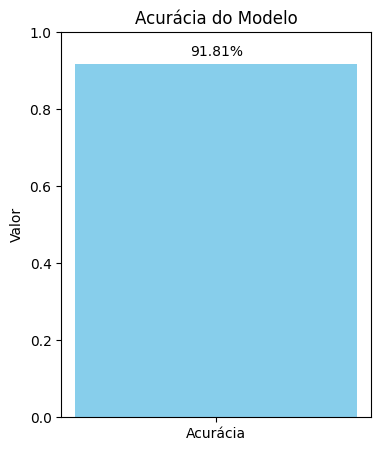

In [473]:
# Usando a métrica da acurácia
accuracy = accuracy_score(y_test, predictions)
print("Acurácia:", accuracy, "\n")

# Criando gráfico
plt.figure(figsize=(4, 5))
plt.bar(['Acurácia'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Acurácia do Modelo')
plt.ylabel('Valor')
plt.text(0, accuracy + 0.02, f"{accuracy:.2%}", ha='center')  # Exibe percentual acima da barra
plt.show()

A matriz de confusão foi gerada com a função confusion_matrix, comparando as previsões do modelo com os valores reais. Essa métrica detalha os acertos e erros em cada classe, separando corretamente os verdadeiros e falsos positivos e negativos. É fundamental para entender como o modelo erra, complementando a análise da acurácia e auxiliando na identificação de possíveis ajustes.

Matriz de confusão:
 [[ 57   7]
 [  7 100]]




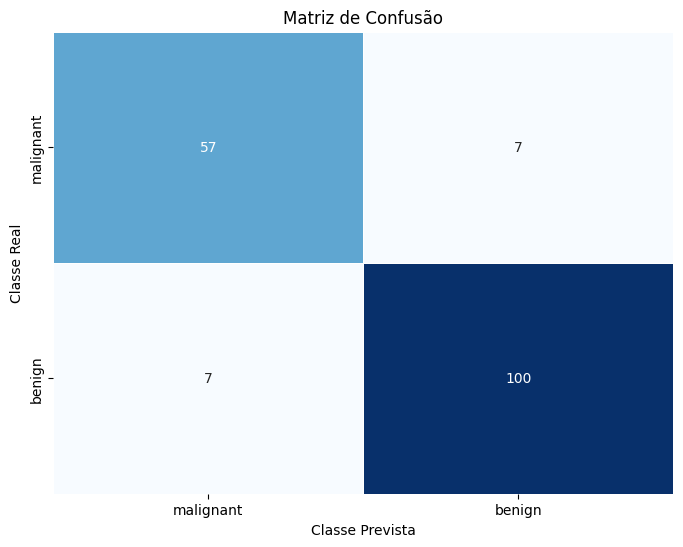

In [474]:
# Usando a métrica da matriz de confusão
matrix = confusion_matrix(y_test, predictions)
print("Matriz de confusão:\n", matrix)
print("\n")

# Criando gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names,
            linewidths=.5, cbar=False)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

Detalhamento completo da Matriz de Confusão:
- VP, ou Verdadeiro Positivo (malignant corretamente classificado): 57
- FN, ou Falso Negativo (malignant classificado como benign): 7
- FP, ou Falso Positivo (benign classificado como malignant): 7
- VN, ou Verdadeiro Negativo (benign corretamente classificado): 100

As métricas de Precisão, Recall e F1-Score foram calculadas com média ponderada, considerando o peso de cada classe no conjunto de dados. Elas oferecem uma avaliação mais detalhada do modelo do que a acurácia isolada, principalmente quando os tipos de erro têm impactos diferentes. A precisão mostra quantas previsões positivas foram corretas, o recall indica quantos casos positivos reais foram identificados, e o F1-score equilibra ambos. Essas métricas são essenciais em contextos sensíveis como diagnósticos médicos, onde um falso negativo pode ser mais crítico que um falso positivo.


Precisão, Recall e F1-Score (Média Ponderada) 
- Precisão Média (ponderada): 0.92
- Recall Médio (ponderado):   0.92
- F1-Score Médio (ponderado): 0.92 



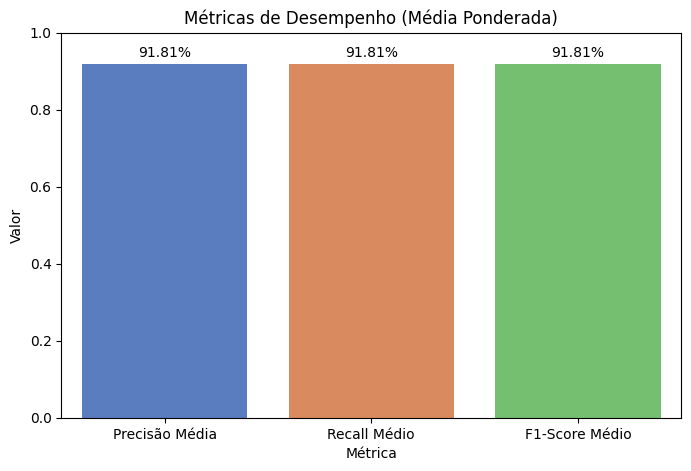

In [475]:
# Usando as métricas precisão, recall e f1-score
print("\nPrecisão, Recall e F1-Score (Média Ponderada) ")

precision_media = precision_score(y_test, predictions, average='weighted')
recall_media = recall_score(y_test, predictions, average='weighted')
f1_media = f1_score(y_test, predictions, average='weighted')

print(f"- Precisão Média (ponderada): {precision_media:.2f}")
print(f"- Recall Médio (ponderado):   {recall_media:.2f}")
print(f"- F1-Score Médio (ponderado): {f1_media:.2f} \n")

# Criando gráfico
metrics = [precision_media, recall_media, f1_media]
labels = ['Precisão Média', 'Recall Médio', 'F1-Score Médio']

df = pd.DataFrame({
    'Métrica': labels,
    'Valor': metrics
})

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Métrica', y='Valor', hue='Métrica', palette='muted', dodge=False, legend=False)
plt.title('Métricas de Desempenho (Média Ponderada)')
plt.ylim(0, 1)

for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center')

plt.ylabel('Valor')
plt.show()

Conforme demonstrado pelas métricas, o modelo se apresentou com um bom desempenho, ainda mais levando em conta o contexto da análise de diagnóstico para o câncer de mama, o que pode ajudar muito quando houverem novos dados reais que ajudem a dizer se uma pessoa está com esse tipo de câncer ou não, com acerto de quase 92% das previsões realizadas.

Mas observa-se que é possível melhorar o modelo, ja que há alguns dados de falsos negativos demonstrados pela métrica de matriz de confusão, o que neste contexto se mostra mais importante analisar, pois corre o risco de fazer o diagnóstico errado quando for o caso de a pessoa estiver doente mas o modelo prever que está saudável.

Talvez seja interessante mudar alguns parâmetros como o exemplo do max_depth que limita o tamanho dos níveis do nó da árvore, para buscar resultados mais precisos e que diminua a quantidade de falsos positivos ou até mesmo usar um outro tipo de modelo de classificação, como o RandomForest, que possa ajudar a reduzir esses falsos negativos.

É importante compreender o contexto dos dados presentes no dataset, pois isso permite extrair informações relevantes e conduzir análises mais significativas. Além disso, é essencial avaliar e testar diferentes modelos de machine learning, buscando aqueles que melhor se adequem ao problema e que facilitem a extração de conhecimento a partir dos dados.